In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('house_data.csv') #reading data
price = house['price'] # y of the data for linear regression

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# Features

Here I have generated new and transformed existed features: __date__ has been transformed because objects can't be fitted to train a model, so I have made a decision to transform it to datetype and than extract year, month and day; __yr_renovated__ has been changed in a way that if it was renovated then I substracted this year of renovation from 2018, if it was not I just have left 0;  __yr_built__ has been changed to know how old is the building instead of year of construction; __zipcode__ column I have created dummies columns to have a look if that encereases the score

In [5]:
house['date'] = pd.to_datetime(house['date'])#transforming date column to datetype
house['year'] = house['date'].dt.year #extracting year 
house['month'] = house['date'].dt.month #month
house['day'] = house['date'].dt.day #day
house['yr_renovated'] = house['yr_renovated'].apply(lambda x: 2018 - x if x != 0 else 0)#analysing how old is a renovation
house['yr_built'] = np.abs(house['yr_built'] - 2018) #analysing how old is a building
house = pd.concat([house, pd.get_dummies(house['zipcode'])], axis=1); # creating dummies from zipcode

house = house.drop('date', axis = 1)
house = house.drop('zipcode', axis = 1)
house = house.drop('id', axis = 1)

In [6]:
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,0,0,0,0,0,0,0,0,0


# Feature Ananlysis

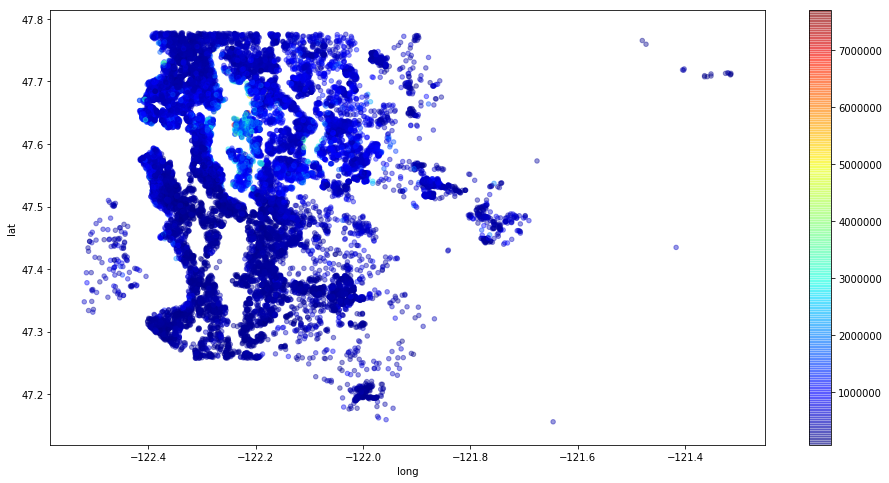

In [7]:
# visualising houses on the map with indication of house price
house.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(16,8), c=price,
           cmap=plt.get_cmap("jet"), colorbar=True, sharex=False)
# As we can see most of the houses are cheaper than 300 thousands and most of the expensive houses are 
#located near the water (water is mainly white spacec on the graph)

<Figure size 864x576 with 0 Axes>

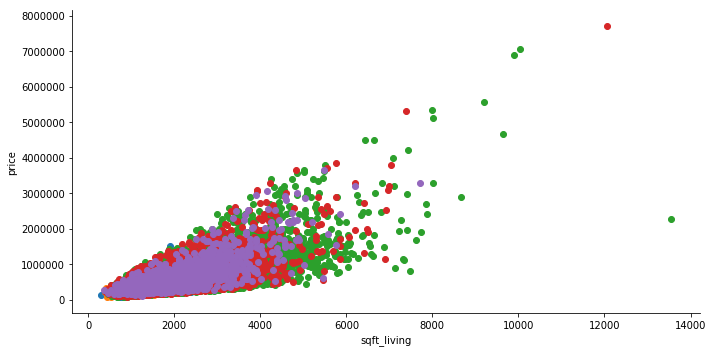

In [8]:
#visualizationg of price corresponging to sqrt_living with indication of condiditon of the property
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=house, hue='condition',size= 5, aspect=2)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

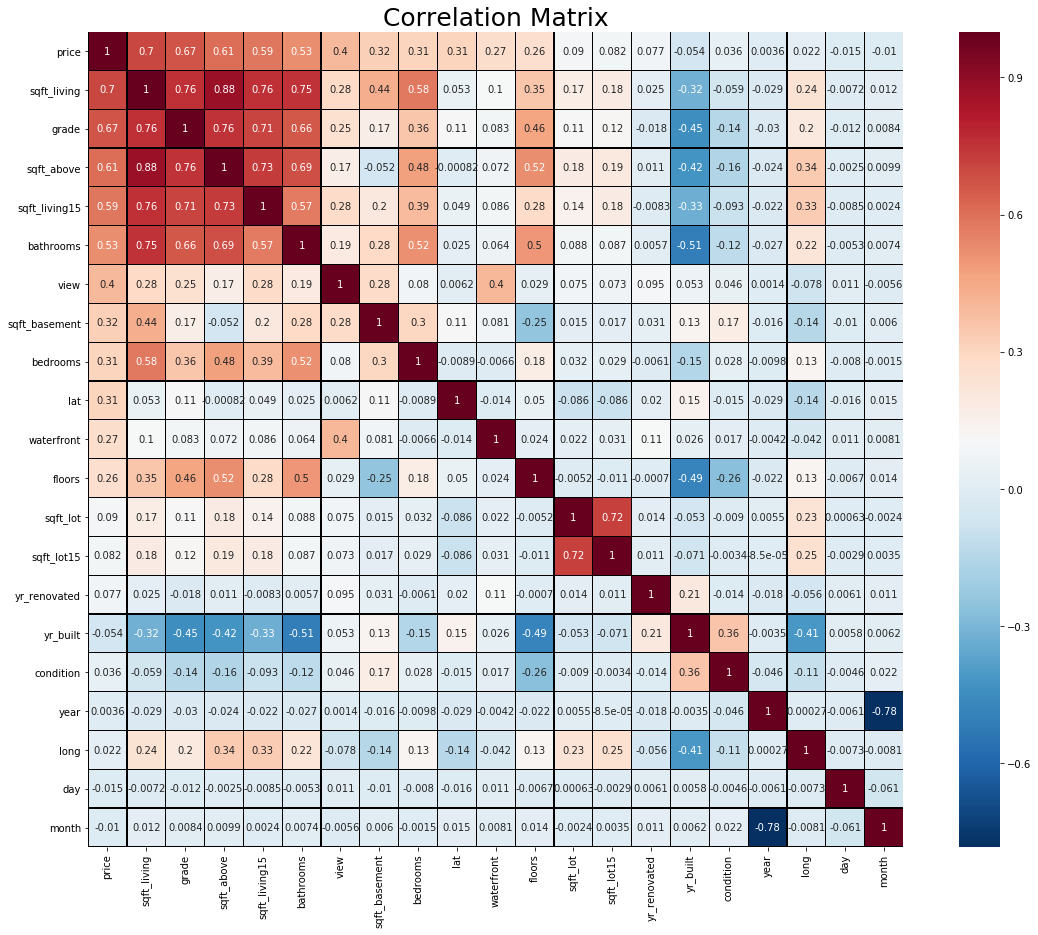

In [9]:
#creating correlation matrix to know the relation between target feature and other features
features = ['price','sqft_living','grade','sqft_above','sqft_living15', 'bathrooms','view','sqft_basement',
            'bedrooms', 'lat', 'waterfront', 'floors', 'sqft_lot', 'sqft_lot15','yr_renovated','yr_built',
            'condition', 'year','long', 'day', 'month']
f, ax = plt.subplots(figsize=(20, 15))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(house[features].corr(), linewidths=0.25, vmax=1.0, square=True, cmap="RdBu_r", linecolor='k', annot=True)

In [10]:
house = house.drop('price', axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(house, price, test_size = 0.2, random_state=49)
print("Linear regression datasets")
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

Linear regression datasets
(17290, 90) (17290,)
(4323, 90) (4323,)


# Using different algorithms for price predictions

In these task we are given dataset to predict price of the house. I will use 3 metrics to evalueate the models:
* MSE
\begin{equation*}
MSE = \frac{1}{n}\sum_{k=1}^n (Y_i - \dot{Y_i} )^2 
\end{equation*}
* RMSE
\begin{equation*}
RMSE = \sqrt{\frac{1}{n}\sum_{k=1}^n (Y_i - \dot{Y_i} )^2 }
\end{equation*}
* Variance score

## Linear Regression

Previous results:
* MSE train: 67931066834.67; test: 70035987663.86; 1 feature
* MSE train: 62306584063.49; test: 64466114800.02; 2 features

* MSE train: 61471318688.55; test: 63394337312.83; 3 features
* MSE train: 61331972036.77; test: 63346196234.39; 4 features

* MSE train: 61062544452.85; test: 62906940485.03; 5 features
* MSE train: 57063428453.64; test: 57520064549.14; 6 features

* MSE train: 57063428453.64; test: 57520064549.14; 7 feature
* MSE train: 56474065847.59; test: 57147409666.80; 8 features

* MSE train: 48498227841.03; test: 48670558382.01; 9 feature
* MSE train: 46620127163.50; test: 44954342653.28; 10 features

* MSE train: 46471326069.48; test: 44870210542.26; 11 features
* MSE train: 46450188074.47; test: 44664863538.50; 12 features

* MSE train: 46346785423.06; test: 44802783588.71; 13 features
* MSE train: 46175074862.26; test: 44445870879.89; 14 features

* MSE train: 41929732178.36; test: 40142222536.94; 15 feature
* MSE train: 41609035250.42; test: 39705475435.78; 16 features

* MSE train: 41422672632.55; test: 39456722730.82; 17 features
* MSE train: 41210098136.32; test: 39327197095.20; 18 features

* MSE train: 40699278920.83; test: 38930511620.08; 19 feature
* MSE train: 40694987157.64; test: 38903082114.59; 20 features

* MSE train: 25994480772.17; test: 24585784318.73; 90 features

In [12]:
from sklearn import linear_model
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
predictions = linear.predict(X_test)

In [13]:
# The mean squared error
print("MSE test: %.2f"% mean_squared_error(y_test, predictions))
print("MSE train: %.2f"% mean_squared_error(y_train, linear.predict(X_train)))
# The root mean squared error
print("RMSE: %.2f"% sqrt(mean_squared_error(y_test, predictions)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

MSE test: 24585784318.73
MSE train: 25994480772.17
RMSE: 156798.55
Variance score: 0.83


In [14]:
# to visualize easier I will take features 
train_score = [67931066834.67, 62306584063.49, 61471318688.55, 61331972036.77, 61062544452.85, 57063428453.64,
               57063428453.64, 56474065847.59, 48498227841.03, 46620127163.50, 46471326069.48, 46450188074.47, 
               46346785423.06, 46175074862.26, 41929732178.36, 41609035250.42, 41422672632.55, 41210098136.32, 
               40699278920.83, 40694987157.64, 25994480772.17]
test_score = [70035987663.86,  64466114800.02, 63394337312.83, 63346196234.39, 62906940485.03, 57520064549.14,
              57520064549.14, 57147409666.80, 48670558382.01, 44954342653.28, 44870210542.26, 44664863538.50,
              44802783588.71, 44445870879.89, 40142222536.94, 39705475435.78, 39456722730.82, 39327197095.20,
              38930511620.08, 38903082114.59, 24585784318.73]
number_of_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18, 19, 90]

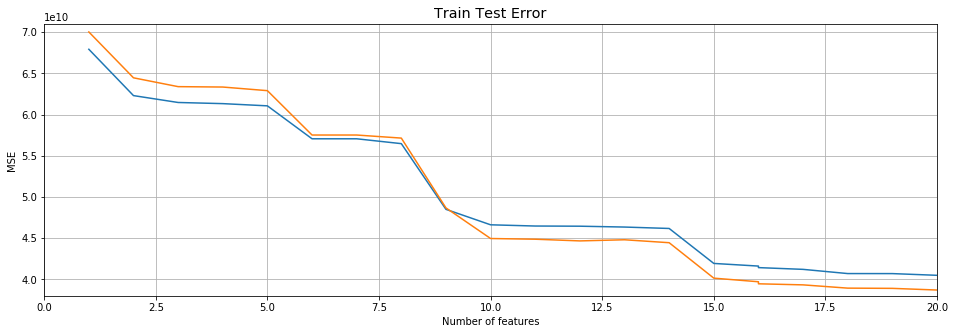

In [15]:
plt.figure(figsize=(16, 5))
plt.plot(number_of_features, train_score)
plt.plot(number_of_features, test_score)
plt.xlim([0, 20])
plt.ylim([38000000000, 71000000000])
plt.rcParams['font.size'] = 12
plt.title('Train Test Error')
plt.xlabel('Number of features')
plt.ylabel('MSE')
plt.grid(True)

To put aside dummies of zipcode the best model was with the biggest number of features, as the MSE continues to go down.  In the following code I have used few other algorithms that might increase the score. 

## Polynomial Regression

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, aˆ2, ab, bˆ2].

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(house)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, price, test_size=0.2, random_state=49)

model = linear_model.LinearRegression()
model.fit(X_train_poly, y_train_poly)
predictions_poly = model.predict(X_test_poly)

In [ ]:
# The mean squared error
print("MSE: %.2f"% mean_squared_error(y_test_poly, predictions_poly))
# The root mean squared error
print("RMSE: %.2f"% sqrt(mean_squared_error(y_test_poly, predictions_poly)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_poly, predictions_poly))

MSE: 13029100351.58
RMSE: 114145.08
Variance score: 0.91


## Random Forest Regressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=500)
rf_model.fit(X_train, y_train)
predictions_rf = rf_model.predict(X_test)

In [ ]:
# The mean squared error
print("MSE: %.2f"% mean_squared_error(y_test, predictions_rf))
# The root mean squared error
print("RMSE: %.2f"% sqrt(mean_squared_error(y_test, predictions_rf)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions_rf))

## XGBRegressor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=7)
xgb.fit(X_train, y_train)
predictions_xgboost = xgb.predict(X_test)

In [ ]:
# The mean squared error
print("MSE: %.2f"% mean_squared_error(y_test, predictions_xgboost))
# The root mean squared error
print("RMSE: %.2f"% sqrt(mean_squared_error(y_test, predictions_xgboost)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions_xgboost))